![jupyter](./tasks/task1.png)


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb
from prettytable import PrettyTable

np.set_printoptions(precision=3, suppress=True)

def print_table(th, td):
    table = PrettyTable(th)
    columns = len(th) 
    td_data = td.tolist()[:]
    while td_data:
        table.add_row(td_data[:columns])
        td_data = td_data[columns:]
    print(table)

In [2]:
df = pd.read_csv('csv/Task1-Var13.csv')
x = df.to_numpy()
print("Выборка (вариант 13) \n", x)

Выборка (вариант 13) 
 [[ 2.064  0.94   4.928  0.943  3.695  5.482  0.705  0.939  1.396  2.415]
 [ 1.395  0.146  1.64   1.997  0.041  1.548  2.209  1.059  0.232  0.039]
 [ 0.466  1.32   0.241  2.868  4.77   2.482  1.023  1.389  0.222  2.169]
 [ 5.375  1.608  1.941  1.464  1.208  1.542  0.619  1.906  0.741  2.604]
 [ 6.927  1.79   4.381  0.043  1.503  0.417  2.303  1.537 10.921  2.087]
 [ 9.411  3.633  2.254  2.814  0.497  3.044  2.832  1.367  3.648  9.483]
 [ 1.668  0.828  5.557  6.035  1.171  0.333  1.104  2.632  0.58   2.676]
 [ 3.604  0.823  1.396  7.921  3.041  2.261  0.233  2.1    0.026  0.36 ]
 [ 2.939  3.2    0.234  5.611  6.665  3.222  3.233  2.51   1.78   0.028]
 [ 4.649  0.577  0.472  0.13   4.305  1.198  5.612  2.77   0.132  0.18 ]
 [ 5.663  1.774  1.097  0.305  1.638  6.714  0.088  3.123  0.149  5.202]
 [ 0.401  9.007  0.148  1.748  6.172  2.424  1.253  0.33   2.136  2.776]
 [ 0.231  1.896  2.424  0.659  0.116  9.778  0.43   4.015  1.162  0.651]
 [ 0.23   0.514  7.561  5.95

In [3]:
# Задание 1 (Найдите крайние члены вариационного ряда и размах выборки)

n = x.size
Max = np.amax(x)
Min = np.amin(x)
w = Max - Min

print("Размер n = %d\nКрайние члены вариационного ряда max = %.3f, min = %.5f\nРазмах выборки w = %f" 
      %(n, Max, Min, w))

Размер n = 150
Крайние члены вариационного ряда max = 10.921, min = 0.00621
Размах выборки w = 10.914790


In [4]:
# Задание 2 (Осуществите группировку данных)
l = math.trunc(1 + math.log2(n))
h = w / l

print("Число интервалов l = %d\nШаг(ширина интервалов группировки) h = %f" %(l, h))

hist, bin_edges = np.histogram(x, l)
bin_edges_average = np.zeros(bin_edges[:8].size)
for i in range (l):
    bin_edges_average[i] = (bin_edges[i] + bin_edges[i + 1]) / 2 
f1 = bin_edges_average
f2 = hist

print("\n")
th = ["Cредние значения каждого из  интервалов", "Частоты попадания элементов в каждый из интервалов"]
td = np.array(f1[0])
for i in range(len(f1)-1):
    td = np.append(td, f2[i])
    td = np.append(td, f1[i+1])
td = np.append(td, f2[7])
print_table(th, td)

p = hist / n

Int = f1
intl = Int - h / 2
intl = np.append(intl, Max)

print("\n")
th = ["Интервал", "Середина интервала int", "Частота f2", "Относительная частота p"]
td = []
for i in range(l):
    td.append("["+str(round(intl[i], 4))+","+str(round(intl[i + 1], 4))+")")
    td.append(round(Int[i], 4))
    td.append(f2[i])
    td.append(round(p[i], 4))
print_table(th, np.array(td))

Число интервалов l = 8
Шаг(ширина интервалов группировки) h = 1.364349


+-----------------------------------------+----------------------------------------------------+
| Cредние значения каждого из  интервалов | Частоты попадания элементов в каждый из интервалов |
+-----------------------------------------+----------------------------------------------------+
|               0.688384375               |                        64.0                        |
|               2.052733125               |                        42.0                        |
|               3.417081875               |                        19.0                        |
|            4.7814306250000005           |                        7.0                         |
|               6.145779375               |                        10.0                        |
|               7.510128125               |                        3.0                         |
|               8.874476875               |           

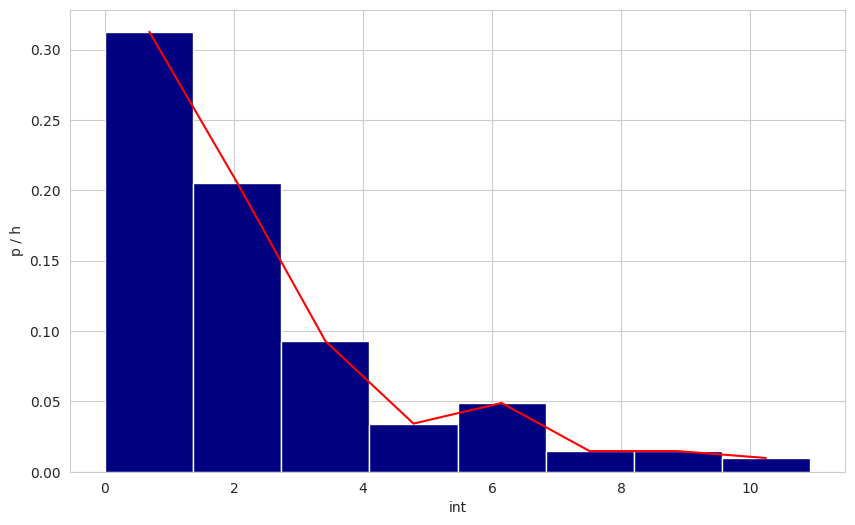

In [5]:
# Задание 3 (По сгруппированным данным постройте гистограмму относительных частот)

sb.set_style("whitegrid")
plt.figure(figsize=(10,6))
X = Int
Y = p / h
plt.bar(X, Y, width=h, color='navy')
plt.plot(X, Y, color='red')
plt.xlabel("int")
plt.ylabel("p / h")
plt.show()

In [25]:
# Задание 4 (Вычислите выборочное среднее и выборочную дисперсию.)

xm = sum(x[i, j] for i in range(np.shape(x)[0]) for j in range(np.shape(x)[1])) / n
s2 = sum((x[i, j] - xm) ** 2 for i in range(np.shape(x)[0]) for j in range(np.shape(x)[1])) / (n - 1)
print("Выброчное среднее xm =", round(xm, 5))
print("Выборочная дисперсия s2 =", round(s2, 5))

Выброчное среднее xm = 2.27537
Выборочная дисперсия s2 = 5.25668


$M\xi =  \displaystyle\int\limits_{-\infty}^{+\infty} xp_\xi(x)dx = \int\limits_0^{+\infty} x \lambda e^{-\lambda x} dx = \dfrac{1}{\lambda}$

$M\xi = xm \rightarrow \lambda = \dfrac{1}{xm} = 0,439$

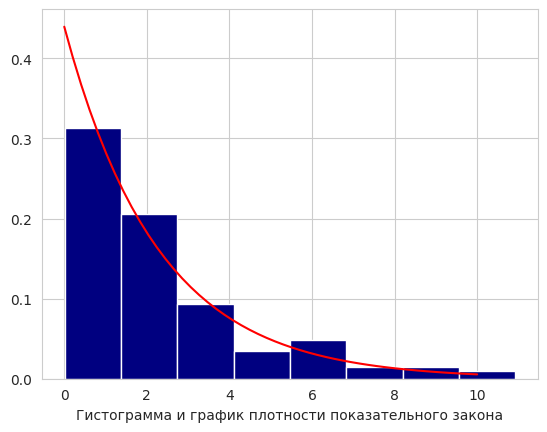

In [7]:
# Задание 5 ( По виду гистограммы определите возможный закон распределения, 
#             оцените параметры этого закона по методу моментов, 
#             постройте совмещенные графики гистограммы и плотности предполагаемого закона)

from scipy.stats import expon

sb.set_style("whitegrid")
ls = np.linspace(0,10)
pdf = expon.pdf(ls, scale=xm)
plt.plot(ls, pdf, color='red')
plt.xlabel('Гистограмма и график плотности показательного закона')
X = Int
Y = p / h
plt.bar(X, Y, width=h, color='navy')
plt.show()

In [22]:
# Задание 6 (Найдите эмпирическую функцию распределения и 
#            постройте совмещенные  графики эмпирической и теоретической функций распределения)

def ind(x):
    if (x > 0).any():
        return 1
    return 0

kum = np.empty(len(p) + 1)
kum[0] = 0
l = len(Int) - 1
for k in range(1, l + 2):
    kum[k] = sum(p[i] for i in range(0, k))
    
def femp(x):
    return sum(p[i] * ind(x - Int[i]) for i in range(l))

print("kum = ", kum)

kum =  [0.0, 0.4267, 0.7067, 0.8333, 0.88, 0.9467, 0.9667, 0.9867, 1.0]


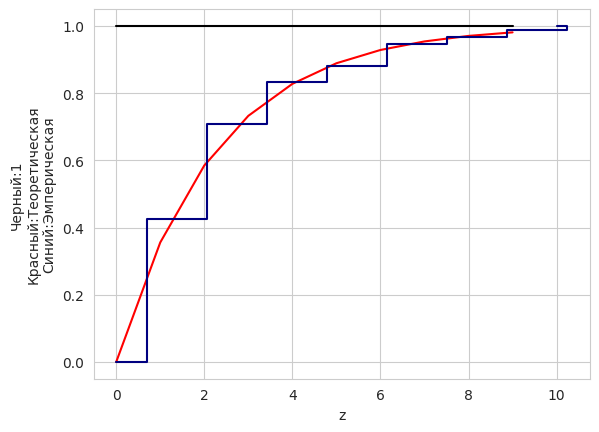

In [9]:
sb.set_style("whitegrid")
ls = np.arange(0, 10, 1)
cdf = expon.cdf(ls, scale=xm)
plt.plot(ls, cdf, color='red')
plt.plot(ls, np.ones(len(ls)), color='black')
plt.step([0] + Int.tolist() + [10], [0] + kum.tolist(), color='navy')
plt.xlabel('z')
plt.ylabel('Черный:1\nКрасный:Теоретическая\nСиний:Эмперическая')
plt.show()

$ Вывод:\space Первоначальная\spaceобработка\spaceпозволяет\spaceпредварительно\spaceотнести\spaceвыборку\spaceк \spaceпоказательному \spaceзакону \spaceс \spaceпараметром  \space \lambda = 0,439$